In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import TensorDataset, DataLoader,Dataset
import torch.optim as optim
import torchvision.transforms.functional as TF
from torchinfo import summary

import numpy as np
from numpy import linalg as LA
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

In [2]:

def load_3channel_img(file_path):
    with open(file_path) as f:
        lines = f.readlines()
    imgs, labels = [], []
    # imgs = torch.Tensor()
    # labels = []
    target_size=(128, 128)
    print('Total train images:', len(lines))
    for i in tqdm(range(len(lines)), desc="Loading images"):
    # for i in tqdm(range(100), desc="Loading images"):
        fn, label = lines[i].strip().split(' ')
        im1 = cv2.imread(fn)
        # 如果需要進行影像處理，請在這裡添加相應的處理步驟
        im1 = cv2.resize(im1, target_size)

        # 轉換成 PyTorch Tensor
        im1_tensor = torch.from_numpy(im1.transpose(2, 0, 1))  # 將通道維度移動到最前面
        
        imgs.append(im1_tensor) 
        labels.append(int(label))

    imgs_tensor = torch.stack(imgs)  # 將列表中的 Tensor 堆疊成一個整體 Tensor
    labels_tensor = torch.tensor(labels)

    return imgs_tensor, labels_tensor

x_3c, y_3c = load_3channel_img('train.txt')
val_x_3c, val_y_3c = load_3channel_img('val.txt')
tx_3c, ty_3c = load_3channel_img('test.txt')


def load_2channel_img(file_path,channel = "RG"):
    with open(file_path) as f:
        lines = f.readlines()
    imgs, labels = [], []
    # imgs = torch.Tensor()
    # labels = []
    target_size=(128, 128)
    print('Total train images:', len(lines))
    for i in tqdm(range(len(lines)), desc="Loading images"):
    # for i in tqdm(range(100), desc="Loading images"):
        fn, label = lines[i].strip().split(' ')
        im1 = cv2.imread(fn)
        # 如果需要進行影像處理，請在這裡添加相應的處理步驟
        im1 = cv2.resize(im1, target_size)

        if channel == "RG":
            im1_rg = im1[:, :, 0:2]
            im1_rg_tensor = torch.from_numpy(im1_rg.transpose(2, 0, 1))
            imgs.append(im1_rg_tensor)
            labels.append(int(label))
            # print(im1_rg.shape)
        elif channel == "GB":
            im1_gb = im1[:, :, 1:3]
            im1_gb_tensor = torch.from_numpy(im1_gb.transpose(2, 0, 1))
            imgs.append(im1_gb_tensor)
            labels.append(int(label))
            # print(im1_gb.shape)
        else:
            im1_rb = im1[:, :, [0, 2]]
            im1_rb_tensor = torch.from_numpy(im1_rb.transpose(2, 0, 1))
            imgs.append(im1_rb_tensor)
            labels.append(int(label))
            # print(im1_rb.shape)


    imgs_tensor = torch.stack(imgs)  # 將列表中的 Tensor 堆疊成一個整體 Tensor
    labels_tensor = torch.tensor(labels)

    return imgs_tensor, labels_tensor

x_RG, y_RG = load_2channel_img('train.txt',"RG")
val_x_RG, val_y_RG = load_2channel_img('val.txt',"RG")
tx_RG, ty_RG = load_2channel_img('test.txt',"RG")
x_GB, y_GB = load_2channel_img('train.txt',"GB")
val_x_GB, val_y_GB = load_2channel_img('val.txt',"GB")
tx_GB, ty_GB = load_2channel_img('test.txt',"GB")
x_RB, y_RB = load_2channel_img('train.txt',"RB")
val_x_RB, val_y_RB = load_2channel_img('val.txt',"RB")
tx_RB, ty_RB = load_2channel_img('test.txt',"RB")

def load_1channel_img(file_path,channel = "R"):
    with open(file_path) as f:
        lines = f.readlines()
    imgs, labels = [], []
    # imgs = torch.Tensor()
    # labels = []
    target_size=(128, 128)
    print('Total train images:', len(lines))
    for i in tqdm(range(len(lines)), desc="Loading images"):
    # for i in tqdm(range(100), desc="Loading images"):
        fn, label = lines[i].strip().split(' ')
        im1 = cv2.imread(fn)
        # 如果需要進行影像處理，請在這裡添加相應的處理步驟
        im1 = cv2.resize(im1, target_size)

        # 把圖片RGB都拆開
        im1_r, im1_g, im1_b = im1[:, :, 0], im1[:, :, 1], im1[:, :, 2]
        if channel == "R":
            im1_r = np.expand_dims(im1_r, axis=2)
            im1_r_tensor = torch.from_numpy(im1_r.transpose(2, 0, 1))
            imgs.append(im1_r_tensor)
            labels.append(int(label))
        elif channel == "G":
            im1_g = np.expand_dims(im1_g, axis=2)
            im1_g_tensor = torch.from_numpy(im1_g.transpose(2, 0, 1))
            imgs.append(im1_g_tensor)
            labels.append(int(label))
        else:
            im1_b = np.expand_dims(im1_b, axis=2)
            im1_b_tensor = torch.from_numpy(im1_b.transpose(2, 0, 1))
            imgs.append(im1_b_tensor)
            labels.append(int(label))
    
    imgs_tensor = torch.stack(imgs)  # 將列表中的 Tensor 堆疊成一個整體 Tensor
    labels_tensor = torch.tensor(labels)

    return imgs_tensor, labels_tensor

x_R, y_R = load_1channel_img('train.txt',"R")
val_x_R, val_y_R = load_1channel_img('val.txt',"R")
tx_R, ty_R = load_1channel_img('test.txt',"R")
x_G, y_G = load_1channel_img('train.txt',"G")
val_x_G, val_y_G = load_1channel_img('val.txt',"G")
tx_G, ty_G = load_1channel_img('test.txt',"G")
x_B, y_B = load_1channel_img('train.txt',"B")
val_x_B, val_y_B = load_1channel_img('val.txt',"B")
tx_B, ty_B = load_1channel_img('test.txt',"B")

Total train images: 63325


Loading images: 100%|██████████| 63325/63325 [00:26<00:00, 2429.83it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2351.74it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2445.72it/s]


Total train images: 63325


Loading images: 100%|██████████| 63325/63325 [00:22<00:00, 2774.15it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2815.02it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2791.58it/s]


Total train images: 63325


Loading images: 100%|██████████| 63325/63325 [00:22<00:00, 2799.53it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2857.10it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2872.60it/s]


Total train images: 63325


Loading images: 100%|██████████| 63325/63325 [00:22<00:00, 2783.53it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2766.41it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2794.46it/s]


Total train images: 63325


Loading images: 100%|██████████| 63325/63325 [00:22<00:00, 2796.41it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2833.24it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2859.23it/s]


Total train images: 63325


Loading images: 100%|██████████| 63325/63325 [00:23<00:00, 2733.70it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2825.29it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2844.35it/s]


Total train images: 63325


Loading images: 100%|██████████| 63325/63325 [00:24<00:00, 2597.37it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2821.64it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2847.34it/s]


In [3]:
class attention2d(nn.Module):
    def __init__(self, in_planes, ratios, K, temperature, init_weight=True):
        super(attention2d, self).__init__()
        assert temperature%3==1
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        if in_planes!=3:
            hidden_planes = int(in_planes*ratios)+1
        else:
            hidden_planes = K

        self.fc1 = nn.Conv2d(in_planes, hidden_planes, 1, bias=False)
        # self.bn = nn.BatchNorm2d(hidden_planes)
        self.fc2 = nn.Conv2d(hidden_planes, K, 1, bias=True)
        self.temperature = temperature
        if init_weight:
            self._initialize_weights()


    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            if isinstance(m ,nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def updata_temperature(self):
        if self.temperature!=1:
            self.temperature -=3
            print('Change temperature to:', str(self.temperature))


    def forward(self, x):
        x = self.avgpool(x)
        x = self.fc1(x)
        x = F.relu(x)
        # print(x.shape)
        x = self.fc2(x).view(x.size(0), -1)
        return F.softmax(x/self.temperature, 1)

class Dynamic_conv2d_const_channel(nn.Module):
    def __init__(self, in_planes, out_planes, kernel_size, ratio=0.25, stride=1, padding=0, dilation=1, groups=1, bias=True, K=4,temperature=34, init_weight=True):
        super(Dynamic_conv2d_const_channel, self).__init__()
        assert in_planes%groups==0
        self.in_planes = in_planes
        self.out_planes = out_planes
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        self.dilation = dilation
        self.groups = groups
        self.bias = bias
        self.K = K
        self.attention = attention2d(in_planes, ratio, K, temperature)

        self.weight = nn.Parameter(torch.randn(K, out_planes, in_planes//groups, kernel_size, kernel_size), requires_grad=True)
        if bias:
            self.bias = nn.Parameter(torch.zeros(K, out_planes))
        else:
            self.bias = None
        if init_weight:
            self._initialize_weights()

        #TODO 初始化
    def _initialize_weights(self):
        for i in range(self.K):
            nn.init.kaiming_uniform_(self.weight[i])


    def update_temperature(self):
        self.attention.updata_temperature()

    def forward(self, x):
        softmax_attention = self.attention(x)
        batch_size, in_planes, height, width = x.size()
        x = x.view(1, -1, height, width)
        weight = self.weight.view(self.K, -1)

        aggregate_weight = torch.mm(softmax_attention, weight).view(batch_size*self.out_planes, self.in_planes//self.groups, self.kernel_size, self.kernel_size)
        if self.bias is not None:
            aggregate_bias = torch.mm(softmax_attention, self.bias).view(-1)
            output = F.conv2d(x, weight=aggregate_weight, bias=aggregate_bias, stride=self.stride, padding=self.padding,
                              dilation=self.dilation, groups=self.groups*batch_size)
        else:
            output = F.conv2d(x, weight=aggregate_weight, bias=None, stride=self.stride, padding=self.padding,
                              dilation=self.dilation, groups=self.groups * batch_size)

        output = output.view(batch_size, self.out_planes, output.size(-2), output.size(-1))
        return output
    

    
class AdaptiveChannelConvModule(nn.Module):
    def __init__(self, out_channels, kernel_size,pool = True):
        super(AdaptiveChannelConvModule, self).__init__()
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.conv = Dynamic_conv2d_const_channel(out_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.conv_pad = Dynamic_conv2d_const_channel(2, out_channels//2, kernel_size, padding=kernel_size // 2)
        self.bn1_pad = nn.BatchNorm2d(out_channels//2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.pooling = pool
        
    def forward(self, x):
        batch_size, in_channels, height, width = x.shape
        
        if in_channels < self.out_channels:
            
            x_avgpooled = x.mean(dim=1, keepdim=True)        #channel wise avg pooling
            x_maxpooled = x.max(dim=1, keepdim=True).values  #channel wise max pooling
            x_pad = torch.cat([x_avgpooled, x_maxpooled], dim=1)

            if self.pooling:
                x_pad = self.pool(F.relu(self.bn1_pad(self.conv_pad(x_pad))))
                x = self.pool(x)
            else:
                x_pad = F.relu(self.bn1_pad(self.conv_pad(x_pad)))

            # concat input x and featuremaps x_pad
            x = torch.cat([x, x_pad], dim=1)
            
            # padding channel to self.out_channels
            if x.shape[1] < self.out_channels:
                # print("asasdasd")
                x_avgpooled = x.mean(dim=1, keepdim=True)
                x_maxpooled = x.max(dim=1, keepdim=True).values
                x_avgpooled_repeated = x_avgpooled.repeat(1, (self.out_channels - x.shape[1]) // 2, 1, 1)
                x = torch.cat([x, x_avgpooled_repeated], dim=1)
                x_maxpooled = x_maxpooled.repeat(1, self.out_channels - x.shape[1], 1, 1)
                x = torch.cat([x, x_maxpooled], dim=1) 

        # ensure inputs channel size = self.out_channels
        if x.shape[1] > self.out_channels:
                x = x[:, :self.out_channels, :, :]
    
        out = self.conv(x)
        return out



model = AdaptiveChannelConvModule(out_channels=64, kernel_size=3)
input_image = torch.randn(8, 3, 64, 64) 
output = model(input_image)
print(output.shape)  # 應為 (1, 64, 64, 64)

torch.Size([8, 64, 32, 32])


In [4]:
# # 測試
# # x1 = torch.randn(64, 3, 128, 128)  # 一個RGB圖像
# dynamic_conv = Dynamic_conv2d(out_planes=64, kernel_size=3,stride = 1)
# # out1 = dynamic_conv(x1)
# # print("done 1")
# # print(out1.shape)  # 應輸出 torch.Size([1, 64, 224, 224])

# x2 = torch.randn(64, 128, 128, 128)
# out2 = dynamic_conv(x2)
# print("done")
# print(out2.shape)  # 應輸出 torch.Size([1, 64, 224, 224])

# # x3 = torch.randn(64, 2, 128, 128)
# # # dynamic_conv = Dynamic_conv2d(out_planes=32, kernel_size=3,stride = 1)
# # out2 = dynamic_conv(x3)
# # print(out2.shape)  # 應輸出 torch.Size([1, 64, 224, 224])

In [5]:
# RG
y_RG_tensor = torch.nn.functional.one_hot(y_RG, num_classes=50)
val_y_RG_tensor = torch.nn.functional.one_hot(val_y_RG, num_classes=50)
ty_RG_tensor = torch.nn.functional.one_hot(ty_RG, num_classes=50)

# RB
y_RB_tensor = torch.nn.functional.one_hot(y_RB, num_classes=50)
val_y_RB_tensor = torch.nn.functional.one_hot(val_y_RB, num_classes=50)
ty_RB_tensor = torch.nn.functional.one_hot(ty_RB, num_classes=50)

# GB
y_GB_tensor = torch.nn.functional.one_hot(y_GB, num_classes=50)
val_y_GB_tensor = torch.nn.functional.one_hot(val_y_GB, num_classes=50)
ty_GB_tensor = torch.nn.functional.one_hot(ty_GB, num_classes=50)

# R
y_R_tensor = torch.nn.functional.one_hot(y_R, num_classes=50)
val_y_R_tensor = torch.nn.functional.one_hot(val_y_R, num_classes=50)
ty_R_tensor = torch.nn.functional.one_hot(ty_R, num_classes=50)

# G
y_G_tensor = torch.nn.functional.one_hot(y_G, num_classes=50)
val_y_G_tensor = torch.nn.functional.one_hot(val_y_G, num_classes=50)
ty_G_tensor = torch.nn.functional.one_hot(ty_G, num_classes=50)

# B
y_B_tensor = torch.nn.functional.one_hot(y_B, num_classes=50)
val_y_B_tensor = torch.nn.functional.one_hot(val_y_B, num_classes=50)
ty_B_tensor = torch.nn.functional.one_hot(ty_B, num_classes=50)


y_3c_tensor = torch.nn.functional.one_hot(y_3c, num_classes=50)
val_y_3c_tensor = torch.nn.functional.one_hot(val_y_3c, num_classes=50)
ty_3c_tensor = torch.nn.functional.one_hot(ty_3c, num_classes=50)

# RG
train_dataset_RG = TensorDataset(x_RG, y_RG_tensor)
val_dataset_RG = TensorDataset(val_x_RG, val_y_RG_tensor)
test_dataset_RG = TensorDataset(tx_RG, ty_RG_tensor)

# GB
train_dataset_GB = TensorDataset(x_GB, y_GB_tensor)
val_dataset_GB = TensorDataset(val_x_GB, val_y_GB_tensor)
test_dataset_GB = TensorDataset(tx_GB, ty_GB_tensor)

# RB
train_dataset_RB = TensorDataset(x_RB, y_RB_tensor)
val_dataset_RB = TensorDataset(val_x_RB, val_y_RB_tensor)
test_dataset_RB = TensorDataset(tx_RB, ty_RB_tensor)

# R
train_dataset_R = TensorDataset(x_R, y_R_tensor)
val_dataset_R = TensorDataset(val_x_R, val_y_R_tensor)
test_dataset_R = TensorDataset(tx_R, ty_R_tensor)

# G 
train_dataset_G = TensorDataset(x_G, y_G_tensor)
val_dataset_G = TensorDataset(val_x_G, val_y_G_tensor)
test_dataset_G = TensorDataset(tx_G, ty_G_tensor)

# B
train_dataset_B = TensorDataset(x_B, y_B_tensor)
val_dataset_B = TensorDataset(val_x_B, val_y_B_tensor)
test_dataset_B = TensorDataset(tx_B, ty_B_tensor)

# RGB
train_dataset_3c = TensorDataset(x_3c, y_3c_tensor)
val_dataset_3c = TensorDataset(val_x_3c, val_y_3c_tensor)
test_dataset_3c = TensorDataset(tx_3c, ty_3c_tensor)

batch_size = 128 
shuffle = True  

# RG
train_RG_loader = DataLoader(train_dataset_RG, batch_size=batch_size, shuffle=shuffle)
val_RG_loader = DataLoader(val_dataset_RG, batch_size=batch_size, shuffle=shuffle)
test_RG_loader = DataLoader(test_dataset_RG, batch_size=batch_size, shuffle=shuffle)

# RB
train_RB_loader = DataLoader(train_dataset_RB, batch_size=batch_size, shuffle=shuffle)
val_RB_loader = DataLoader(val_dataset_RB, batch_size=batch_size, shuffle=shuffle)
test_RB_loader = DataLoader(test_dataset_RB, batch_size=batch_size, shuffle=shuffle)

# GB
train_GB_loader = DataLoader(train_dataset_GB, batch_size=batch_size, shuffle=shuffle)
val_GB_loader = DataLoader(val_dataset_GB, batch_size=batch_size, shuffle=shuffle)
test_GB_loader = DataLoader(test_dataset_GB, batch_size=batch_size, shuffle=shuffle)

# R
train_R_loader = DataLoader(train_dataset_R, batch_size=batch_size, shuffle=shuffle)
val_R_loader = DataLoader(val_dataset_R, batch_size=batch_size, shuffle=shuffle)
test_R_loader = DataLoader(test_dataset_R, batch_size=batch_size, shuffle=shuffle)

# G 
train_G_loader = DataLoader(train_dataset_G, batch_size=batch_size, shuffle=shuffle)
val_G_loader = DataLoader(val_dataset_G, batch_size=batch_size, shuffle=shuffle)
test_G_loader = DataLoader(test_dataset_G, batch_size=batch_size, shuffle=shuffle)

# B 
train_B_loader = DataLoader(train_dataset_B, batch_size=batch_size, shuffle=shuffle)
val_B_loader = DataLoader(val_dataset_B, batch_size=batch_size, shuffle=shuffle)
test_B_loader = DataLoader(test_dataset_B, batch_size=batch_size, shuffle=shuffle)

# RGB
train_3c_loader = DataLoader(train_dataset_3c, batch_size=batch_size, shuffle=shuffle)
val_3c_loader = DataLoader(val_dataset_3c, batch_size=batch_size, shuffle=shuffle)
test_3c_loader = DataLoader(test_dataset_3c, batch_size=batch_size, shuffle=shuffle)



In [6]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # self.conv1 = Dynamic_conv2d(out_planes=32, kernel_size=3, stride=1, padding=1)
        # self.conv2 = Dynamic_conv2d(out_planes=64, kernel_size=3, stride=1, padding=1)
        # self.conv3 = Dynamic_conv2d(out_planes=128, kernel_size=3, stride=1, padding=1)
        # self.conv4 = Dynamic_conv2d(out_planes=256, kernel_size=3, stride=1, padding=1)
        # self.conv5 = Dynamic_conv2d(out_planes=512, kernel_size=3, stride=1, padding=1)

        self.conv1 = AdaptiveChannelConvModule(out_channels=32, kernel_size=3,pool = False)
        self.conv2 = AdaptiveChannelConvModule(out_channels=64, kernel_size=3,pool = False)
        self.conv3 = AdaptiveChannelConvModule(out_channels=128, kernel_size=3,pool = False)
        self.conv4 = AdaptiveChannelConvModule(out_channels=256, kernel_size=3,pool = False)
        self.conv5 = AdaptiveChannelConvModule(out_channels=512, kernel_size=3)
        
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        self.bn4 = nn.BatchNorm2d(256)
        self.bn5 = nn.BatchNorm2d(512)
        

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(512 * 2 * 2 , 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 50) 

        self.dropout = nn.Dropout(0.5)  # onlt RGB = 0.3 // all channel = 0.5

    def forward(self, x):
        # print(x.shape)
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        # print(x.shape)
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = self.pool(F.relu(self.bn5(self.conv5(x))))
        # print(x.shape)
        # x = x.view(x.size(0), -1)
        x = self.flatten(x)

        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        
        return x

In [7]:
model = CNNModel()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # 檢查是否有 GPU，有則使用 GPU
model.to(device)  # 將模型移動到設備上

CNNModel(
  (conv1): AdaptiveChannelConvModule(
    (conv): Dynamic_conv2d_const_channel(
      (attention): attention2d(
        (avgpool): AdaptiveAvgPool2d(output_size=1)
        (fc1): Conv2d(32, 9, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (fc2): Conv2d(9, 4, kernel_size=(1, 1), stride=(1, 1))
      )
    )
    (conv_pad): Dynamic_conv2d_const_channel(
      (attention): attention2d(
        (avgpool): AdaptiveAvgPool2d(output_size=1)
        (fc1): Conv2d(2, 1, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (fc2): Conv2d(1, 4, kernel_size=(1, 1), stride=(1, 1))
      )
    )
    (bn1_pad): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): AdaptiveChannelConvModule(
    (conv): Dynamic_conv2d_const_channel(
      (attention): attention2d(
        (avgpool): AdaptiveAvgPool2d(output_size=1)
        (fc1): Conv2d(64, 17, kernel_size

In [8]:
summary(model)

Layer (type:depth-idx)                        Param #
CNNModel                                      --
├─AdaptiveChannelConvModule: 1-1              --
│    └─Dynamic_conv2d_const_channel: 2-1      36,992
│    │    └─attention2d: 3-1                  328
│    └─Dynamic_conv2d_const_channel: 2-2      1,216
│    │    └─attention2d: 3-2                  10
│    └─BatchNorm2d: 2-3                       32
│    └─MaxPool2d: 2-4                         --
├─AdaptiveChannelConvModule: 1-2              --
│    └─Dynamic_conv2d_const_channel: 2-5      147,712
│    │    └─attention2d: 3-3                  1,160
│    └─Dynamic_conv2d_const_channel: 2-6      2,432
│    │    └─attention2d: 3-4                  10
│    └─BatchNorm2d: 2-7                       64
│    └─MaxPool2d: 2-8                         --
├─AdaptiveChannelConvModule: 1-3              --
│    └─Dynamic_conv2d_const_channel: 2-9      590,336
│    │    └─attention2d: 3-5                  4,360
│    └─Dynamic_conv2d_const_channel: 

In [9]:
def train(model,traindataloader,valdataLoader,criterion,optimizer,traing_acc,val_acc,epoch,channel):
    model.train()
    running_loss = 0.0
    train_correct = 0
    train_total = 0

    max_val_acc = 0
    
    running_loss = 0.0
    for inputs, labels in tqdm(traindataloader):
        # print(inputs[0].shape)
        inputs, labels = inputs.float().to(device), labels.float().to(device)  # 將數據移動到設備上

        # 正向傳播
        outputs = model(inputs)
        # print(type(outputs))
        loss = criterion(outputs, labels)

        # 反向傳播和優化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        labels = labels.argmax(dim=1)
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
        running_loss += loss.item() * inputs.size(0)
    
    traing_acc.append(100 * train_correct / train_total)

    model.eval()  # 將模型設置為評估模式
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in valdataLoader:
            inputs, labels = inputs.float().to(device), labels.float().to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            labels = labels.argmax(dim=1)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
    val_acc.append(100 * correct / total)

    if (correct / total) > max_val_acc and channel == "RGB":
        torch.save(model.state_dict(), './model/HW2-1/myModel/myModel.pth')
        max_val_acc = (correct / total)


    epoch_loss = running_loss / len(traindataloader.dataset)
    print(f"Epoch {epoch + 1}/{10}, Loss: {epoch_loss:.4f}, channel = {channel}, Training Accuracy: {100 * train_correct / train_total:.2f}%, Validation Accuracy: {100 * correct / total:.2f}%")

In [10]:
def plot_acc(train_acc,val_acc,channel):
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f"./results/HW2-1/myModel/myModel_{channel}_accuracy_plot.png")
    plt.show()

100%|██████████| 495/495 [00:32<00:00, 15.01it/s]


Epoch 1/10, Loss: 3.5838, channel = R, Training Accuracy: 6.79%, Validation Accuracy: 2.00%


100%|██████████| 495/495 [00:32<00:00, 15.28it/s]


Epoch 1/10, Loss: 3.1838, channel = RG, Training Accuracy: 12.47%, Validation Accuracy: 10.44%


100%|██████████| 495/495 [00:32<00:00, 15.20it/s]


Epoch 1/10, Loss: 3.0161, channel = G, Training Accuracy: 15.32%, Validation Accuracy: 6.44%


100%|██████████| 495/495 [00:33<00:00, 14.92it/s]


Epoch 1/10, Loss: 2.8139, channel = GB, Training Accuracy: 19.36%, Validation Accuracy: 17.78%


100%|██████████| 495/495 [00:32<00:00, 15.05it/s]


Epoch 1/10, Loss: 2.7509, channel = B, Training Accuracy: 21.22%, Validation Accuracy: 14.22%


100%|██████████| 495/495 [00:33<00:00, 14.91it/s]


Epoch 1/10, Loss: 2.5525, channel = RB, Training Accuracy: 25.67%, Validation Accuracy: 17.78%


100%|██████████| 495/495 [00:34<00:00, 14.49it/s]


Epoch 1/10, Loss: 2.4092, channel = RGB, Training Accuracy: 29.23%, Validation Accuracy: 31.78%


100%|██████████| 495/495 [00:32<00:00, 15.06it/s]


Epoch 2/10, Loss: 2.4275, channel = R, Training Accuracy: 29.00%, Validation Accuracy: 20.00%


100%|██████████| 495/495 [00:33<00:00, 14.90it/s]


Epoch 2/10, Loss: 2.2326, channel = RG, Training Accuracy: 33.95%, Validation Accuracy: 33.33%


100%|██████████| 495/495 [00:32<00:00, 15.17it/s]


Epoch 2/10, Loss: 2.1064, channel = G, Training Accuracy: 36.71%, Validation Accuracy: 26.67%


100%|██████████| 495/495 [00:33<00:00, 14.80it/s]


Epoch 2/10, Loss: 1.9121, channel = GB, Training Accuracy: 41.66%, Validation Accuracy: 38.44%


100%|██████████| 495/495 [00:32<00:00, 15.03it/s]


Epoch 2/10, Loss: 1.9180, channel = B, Training Accuracy: 41.37%, Validation Accuracy: 39.11%


100%|██████████| 495/495 [00:33<00:00, 14.87it/s]


Epoch 2/10, Loss: 1.7007, channel = RB, Training Accuracy: 47.01%, Validation Accuracy: 41.56%


100%|██████████| 495/495 [00:33<00:00, 14.61it/s]


Epoch 2/10, Loss: 1.5546, channel = RGB, Training Accuracy: 50.53%, Validation Accuracy: 45.56%


100%|██████████| 495/495 [00:32<00:00, 15.08it/s]


Epoch 3/10, Loss: 1.7133, channel = R, Training Accuracy: 46.80%, Validation Accuracy: 36.00%


100%|██████████| 495/495 [00:33<00:00, 14.82it/s]


Epoch 3/10, Loss: 1.3949, channel = RG, Training Accuracy: 54.79%, Validation Accuracy: 46.89%


100%|██████████| 495/495 [00:33<00:00, 15.00it/s]


Epoch 3/10, Loss: 1.3468, channel = G, Training Accuracy: 55.97%, Validation Accuracy: 43.78%


100%|██████████| 495/495 [00:33<00:00, 14.89it/s]


Epoch 3/10, Loss: 1.1915, channel = GB, Training Accuracy: 60.56%, Validation Accuracy: 44.44%


100%|██████████| 495/495 [00:32<00:00, 15.07it/s]


Epoch 3/10, Loss: 1.2351, channel = B, Training Accuracy: 59.48%, Validation Accuracy: 40.22%


100%|██████████| 495/495 [00:33<00:00, 14.85it/s]


Epoch 3/10, Loss: 1.0176, channel = RB, Training Accuracy: 65.54%, Validation Accuracy: 42.67%


100%|██████████| 495/495 [00:33<00:00, 14.62it/s]


Epoch 3/10, Loss: 0.9149, channel = RGB, Training Accuracy: 68.69%, Validation Accuracy: 42.89%


100%|██████████| 495/495 [00:32<00:00, 15.09it/s]


Epoch 4/10, Loss: 1.1433, channel = R, Training Accuracy: 62.55%, Validation Accuracy: 42.22%


100%|██████████| 495/495 [00:33<00:00, 14.96it/s]


Epoch 4/10, Loss: 0.8138, channel = RG, Training Accuracy: 71.73%, Validation Accuracy: 49.56%


100%|██████████| 495/495 [00:32<00:00, 15.13it/s]


Epoch 4/10, Loss: 0.7907, channel = G, Training Accuracy: 72.27%, Validation Accuracy: 44.67%


100%|██████████| 495/495 [00:33<00:00, 14.97it/s]


Epoch 4/10, Loss: 0.6754, channel = GB, Training Accuracy: 76.17%, Validation Accuracy: 44.00%


100%|██████████| 495/495 [00:32<00:00, 15.20it/s]


Epoch 4/10, Loss: 0.7599, channel = B, Training Accuracy: 74.03%, Validation Accuracy: 45.33%


100%|██████████| 495/495 [00:33<00:00, 14.77it/s]


Epoch 4/10, Loss: 0.5658, channel = RB, Training Accuracy: 79.97%, Validation Accuracy: 45.33%


100%|██████████| 495/495 [00:34<00:00, 14.38it/s]


Epoch 4/10, Loss: 0.5125, channel = RGB, Training Accuracy: 81.81%, Validation Accuracy: 37.33%


100%|██████████| 495/495 [00:33<00:00, 14.99it/s]


Epoch 5/10, Loss: 0.7765, channel = R, Training Accuracy: 74.02%, Validation Accuracy: 45.78%


100%|██████████| 495/495 [00:32<00:00, 15.00it/s]


Epoch 5/10, Loss: 0.4716, channel = RG, Training Accuracy: 83.48%, Validation Accuracy: 46.89%


100%|██████████| 495/495 [00:33<00:00, 14.93it/s]


Epoch 5/10, Loss: 0.4779, channel = G, Training Accuracy: 83.25%, Validation Accuracy: 42.67%


100%|██████████| 495/495 [00:33<00:00, 14.74it/s]


Epoch 5/10, Loss: 0.4341, channel = GB, Training Accuracy: 84.99%, Validation Accuracy: 46.89%


100%|██████████| 495/495 [00:32<00:00, 15.33it/s]


Epoch 5/10, Loss: 0.5198, channel = B, Training Accuracy: 82.26%, Validation Accuracy: 40.89%


100%|██████████| 495/495 [00:33<00:00, 14.66it/s]


Epoch 5/10, Loss: 0.3539, channel = RB, Training Accuracy: 87.68%, Validation Accuracy: 46.00%


100%|██████████| 495/495 [00:34<00:00, 14.48it/s]


Epoch 5/10, Loss: 0.3168, channel = RGB, Training Accuracy: 88.82%, Validation Accuracy: 46.00%


100%|██████████| 495/495 [00:32<00:00, 15.05it/s]


Epoch 6/10, Loss: 0.6143, channel = R, Training Accuracy: 80.08%, Validation Accuracy: 47.56%


100%|██████████| 495/495 [00:33<00:00, 14.80it/s]


Epoch 6/10, Loss: 0.3023, channel = RG, Training Accuracy: 89.63%, Validation Accuracy: 47.78%


100%|██████████| 495/495 [00:32<00:00, 15.12it/s]


Epoch 6/10, Loss: 0.3156, channel = G, Training Accuracy: 89.18%, Validation Accuracy: 46.67%


100%|██████████| 495/495 [00:33<00:00, 14.84it/s]


Epoch 6/10, Loss: 0.2820, channel = GB, Training Accuracy: 90.41%, Validation Accuracy: 46.22%


100%|██████████| 495/495 [00:32<00:00, 15.06it/s]


Epoch 6/10, Loss: 0.3650, channel = B, Training Accuracy: 87.91%, Validation Accuracy: 45.33%


100%|██████████| 495/495 [00:33<00:00, 14.92it/s]


Epoch 6/10, Loss: 0.2396, channel = RB, Training Accuracy: 91.85%, Validation Accuracy: 48.00%


100%|██████████| 495/495 [00:33<00:00, 14.70it/s]


Epoch 6/10, Loss: 0.2315, channel = RGB, Training Accuracy: 92.32%, Validation Accuracy: 47.11%


100%|██████████| 495/495 [00:32<00:00, 15.01it/s]


Epoch 7/10, Loss: 0.4554, channel = R, Training Accuracy: 85.21%, Validation Accuracy: 44.67%


100%|██████████| 495/495 [00:33<00:00, 14.74it/s]


Epoch 7/10, Loss: 0.2261, channel = RG, Training Accuracy: 92.43%, Validation Accuracy: 48.44%


100%|██████████| 495/495 [00:33<00:00, 14.98it/s]


Epoch 7/10, Loss: 0.2454, channel = G, Training Accuracy: 92.05%, Validation Accuracy: 44.89%


100%|██████████| 495/495 [00:33<00:00, 14.72it/s]


Epoch 7/10, Loss: 0.2079, channel = GB, Training Accuracy: 93.04%, Validation Accuracy: 47.78%


100%|██████████| 495/495 [00:32<00:00, 15.04it/s]


Epoch 7/10, Loss: 0.3027, channel = B, Training Accuracy: 90.21%, Validation Accuracy: 42.44%


100%|██████████| 495/495 [00:33<00:00, 14.87it/s]


Epoch 7/10, Loss: 0.1921, channel = RB, Training Accuracy: 93.73%, Validation Accuracy: 49.11%


100%|██████████| 495/495 [00:34<00:00, 14.53it/s]


Epoch 7/10, Loss: 0.2729, channel = RGB, Training Accuracy: 91.58%, Validation Accuracy: 48.44%


100%|██████████| 495/495 [00:33<00:00, 14.99it/s]


Epoch 8/10, Loss: 0.3823, channel = R, Training Accuracy: 87.72%, Validation Accuracy: 43.78%


100%|██████████| 495/495 [00:33<00:00, 14.83it/s]


Epoch 8/10, Loss: 0.1669, channel = RG, Training Accuracy: 94.64%, Validation Accuracy: 46.44%


100%|██████████| 495/495 [00:33<00:00, 14.97it/s]


Epoch 8/10, Loss: 0.1816, channel = G, Training Accuracy: 94.18%, Validation Accuracy: 47.33%


100%|██████████| 495/495 [00:33<00:00, 14.72it/s]


Epoch 8/10, Loss: 0.1654, channel = GB, Training Accuracy: 94.65%, Validation Accuracy: 50.89%


100%|██████████| 495/495 [00:33<00:00, 14.92it/s]


Epoch 8/10, Loss: 0.2594, channel = B, Training Accuracy: 91.88%, Validation Accuracy: 44.22%


100%|██████████| 495/495 [00:33<00:00, 14.69it/s]


Epoch 8/10, Loss: 0.1476, channel = RB, Training Accuracy: 95.28%, Validation Accuracy: 46.44%


100%|██████████| 495/495 [00:34<00:00, 14.49it/s]


Epoch 8/10, Loss: 0.1442, channel = RGB, Training Accuracy: 95.34%, Validation Accuracy: 46.00%


100%|██████████| 495/495 [00:32<00:00, 15.04it/s]


Epoch 9/10, Loss: 0.3463, channel = R, Training Accuracy: 89.17%, Validation Accuracy: 44.44%


100%|██████████| 495/495 [00:33<00:00, 14.83it/s]


Epoch 9/10, Loss: 0.1431, channel = RG, Training Accuracy: 95.50%, Validation Accuracy: 48.22%


100%|██████████| 495/495 [00:32<00:00, 15.05it/s]


Epoch 9/10, Loss: 0.1534, channel = G, Training Accuracy: 95.01%, Validation Accuracy: 45.33%


100%|██████████| 495/495 [00:33<00:00, 14.85it/s]


Epoch 9/10, Loss: 0.1554, channel = GB, Training Accuracy: 95.16%, Validation Accuracy: 48.00%


100%|██████████| 495/495 [00:32<00:00, 15.02it/s]


Epoch 9/10, Loss: 0.2111, channel = B, Training Accuracy: 93.37%, Validation Accuracy: 42.22%


100%|██████████| 495/495 [00:32<00:00, 15.35it/s]


Epoch 9/10, Loss: 0.1587, channel = RB, Training Accuracy: 95.04%, Validation Accuracy: 46.89%


100%|██████████| 495/495 [00:31<00:00, 15.96it/s]


Epoch 9/10, Loss: 0.1176, channel = RGB, Training Accuracy: 96.29%, Validation Accuracy: 48.89%


100%|██████████| 495/495 [00:30<00:00, 16.46it/s]


Epoch 10/10, Loss: 0.2790, channel = R, Training Accuracy: 91.21%, Validation Accuracy: 46.44%


100%|██████████| 495/495 [00:30<00:00, 16.23it/s]


Epoch 10/10, Loss: 0.1189, channel = RG, Training Accuracy: 96.21%, Validation Accuracy: 45.78%


100%|██████████| 495/495 [00:30<00:00, 16.46it/s]


Epoch 10/10, Loss: 0.1442, channel = G, Training Accuracy: 95.47%, Validation Accuracy: 46.00%


100%|██████████| 495/495 [00:30<00:00, 16.21it/s]


Epoch 10/10, Loss: 0.2318, channel = GB, Training Accuracy: 93.14%, Validation Accuracy: 44.00%


100%|██████████| 495/495 [00:30<00:00, 16.46it/s]


Epoch 10/10, Loss: 0.1769, channel = B, Training Accuracy: 94.44%, Validation Accuracy: 45.11%


100%|██████████| 495/495 [00:30<00:00, 16.22it/s]


Epoch 10/10, Loss: 0.1605, channel = RB, Training Accuracy: 95.26%, Validation Accuracy: 46.67%


100%|██████████| 495/495 [00:31<00:00, 15.93it/s]


Epoch 10/10, Loss: 0.1050, channel = RGB, Training Accuracy: 96.77%, Validation Accuracy: 46.89%


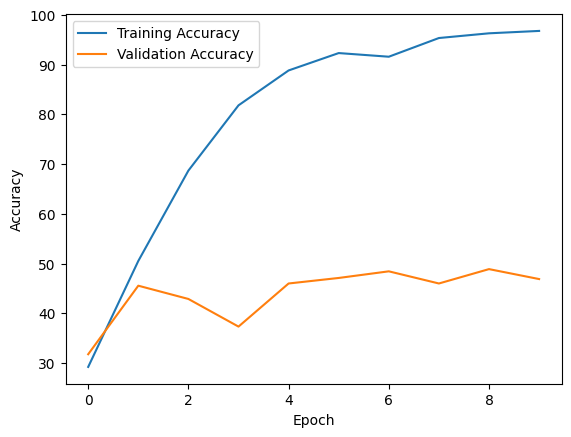

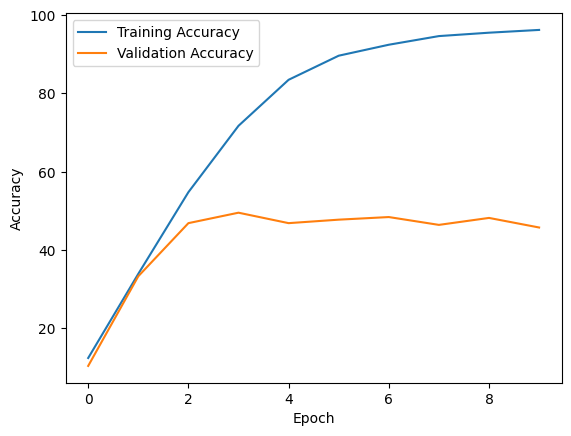

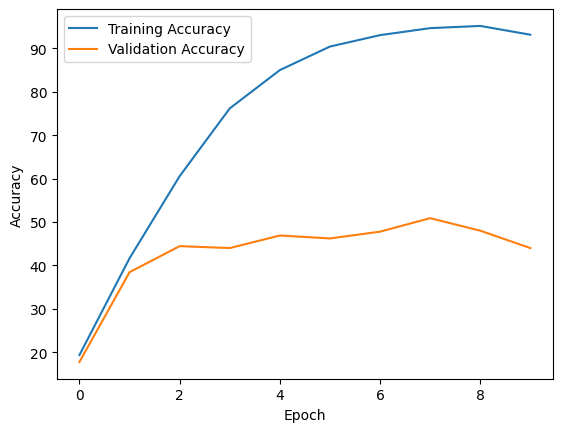

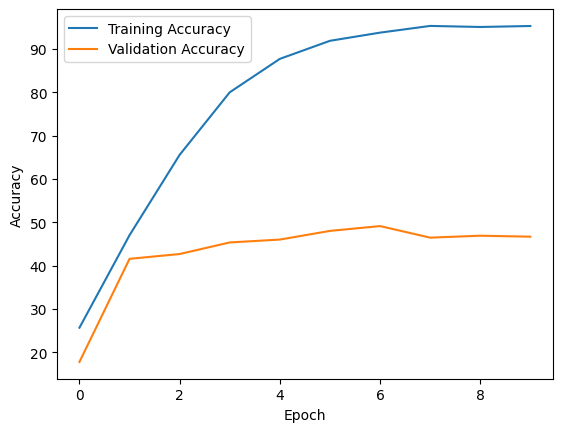

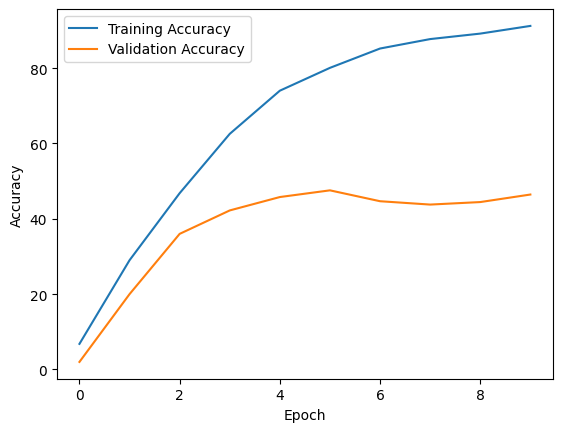

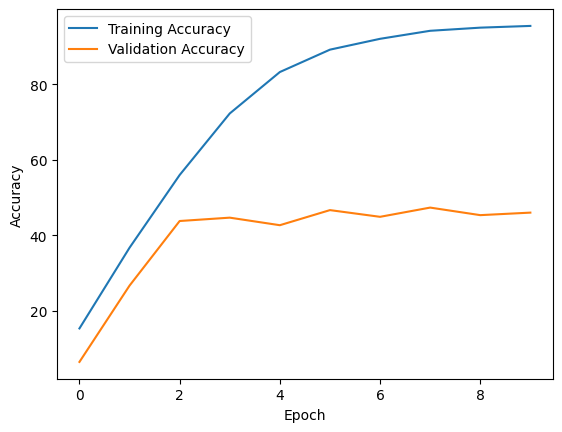

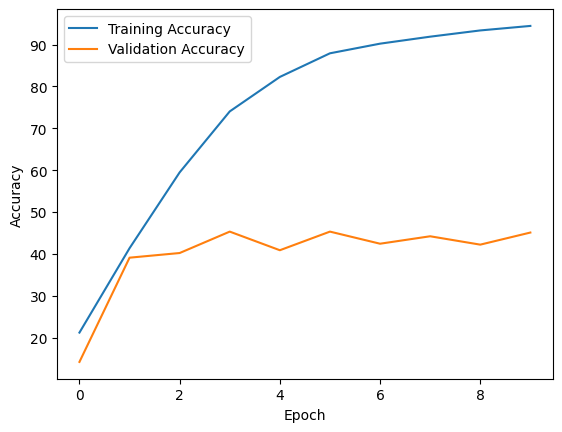

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# for param in model.parameters():
#     param = param.to(device)

# 訓練循環
epochs = 10  # 設定訓練輪數

traing_acc_3c = []
val_acc_3c = []

traing_acc_RG = []
val_acc_RG = []

traing_acc_RB = []
val_acc_RB = []

traing_acc_GB = []
val_acc_GB = []

traing_acc_R = []
val_acc_R = []

traing_acc_G = []
val_acc_G = []

traing_acc_B = []
val_acc_B = []

for epoch in range(epochs):
    model.train()  # 將模型設置為訓練模式

    train(model,train_R_loader,val_R_loader,criterion,optimizer,traing_acc_R,val_acc_R,epoch,"R")
    train(model,train_RG_loader,val_RG_loader,criterion,optimizer,traing_acc_RG,val_acc_RG,epoch,"RG")
    train(model,train_G_loader,val_G_loader,criterion,optimizer,traing_acc_G,val_acc_G,epoch,"G")
    train(model,train_GB_loader,val_GB_loader,criterion,optimizer,traing_acc_GB,val_acc_GB,epoch,"GB")
    train(model,train_B_loader,val_B_loader,criterion,optimizer,traing_acc_B,val_acc_B,epoch,"B")
    train(model,train_RB_loader,val_RB_loader,criterion,optimizer,traing_acc_RB,val_acc_RB,epoch,"RB")
    train(model,train_3c_loader,val_3c_loader,criterion,optimizer,traing_acc_3c,val_acc_3c,epoch,"RGB")

    
    
plot_acc(traing_acc_3c,val_acc_3c,"RGB")
plot_acc(traing_acc_RG,val_acc_RG,"RG")
plot_acc(traing_acc_GB,val_acc_GB,"GB")
plot_acc(traing_acc_RB,val_acc_RB,"RB")
plot_acc(traing_acc_R,val_acc_R,"R")
plot_acc(traing_acc_G,val_acc_G,"G")
plot_acc(traing_acc_B,val_acc_B,"B")


In [14]:
def test(model,dataloader,channel = "RGB"):
    correct = 0
    total = 0
    for inputs, labels in tqdm(dataloader, desc="Evaluating"):
        inputs, labels = inputs.float().to(device), labels.float().to(device)
        labels = labels.argmax(dim=1)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"{channel}-channel Test Accuracy: {accuracy:.4f}")

In [15]:

model_test_path = f"./model/HW2-1/myModel/myModel.pth"
model_test = CNNModel()
model_test.load_state_dict(torch.load(model_test_path))
model_test.to(device)
model_test.eval()
#test_RGB
test(model_test,test_3c_loader,"RGB")

#test RG
test(model_test,test_RG_loader,"RG")

#test RB
test(model_test,test_RB_loader,"RB")

#test GB
test(model_test,test_GB_loader,"GB")

#test R
test(model_test,test_R_loader,"R")

#test G
test(model_test,test_G_loader,"G")

#test R
test(model_test,test_B_loader,"B")

Evaluating: 100%|██████████| 4/4 [00:00<00:00, 45.75it/s]


RGB-channel Test Accuracy: 0.5156


Evaluating: 100%|██████████| 4/4 [00:00<00:00, 47.74it/s]


RG-channel Test Accuracy: 0.4578


Evaluating: 100%|██████████| 4/4 [00:00<00:00, 47.03it/s]


RB-channel Test Accuracy: 0.4622


Evaluating: 100%|██████████| 4/4 [00:00<00:00, 48.15it/s]


GB-channel Test Accuracy: 0.4422


Evaluating: 100%|██████████| 4/4 [00:00<00:00, 49.55it/s]


R-channel Test Accuracy: 0.4156


Evaluating: 100%|██████████| 4/4 [00:00<00:00, 49.25it/s]


G-channel Test Accuracy: 0.4556


Evaluating: 100%|██████████| 4/4 [00:00<00:00, 50.18it/s]

B-channel Test Accuracy: 0.4289
